In [1]:
import keras
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [23]:
def capture():
    vid = cv2.VideoCapture(0)
    
    while(True):
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()

        # Display the resulting frame
        cv2.imshow('frame', frame)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # After the loop release the cap object
    vid.release()
    # Destroy all the windowsq
    cv2.destroyAllWindows()
    return frame

def extract(frame):
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(frame)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = frame[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize((160,160))
    return image

In [24]:
frame = capture()

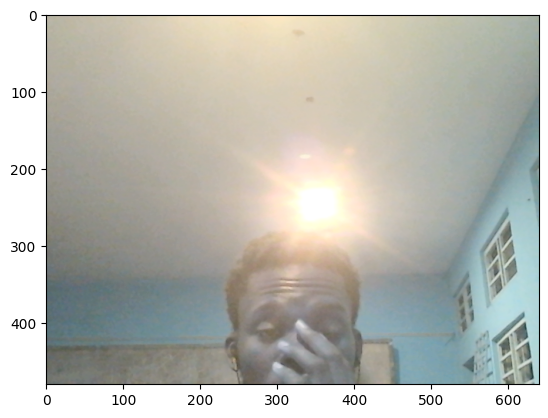

In [10]:
plt.imshow(frame)

In [8]:
np.asarray(img).shape

NameError: name 'img' is not defined

In [ ]:
# Creating database
# It captures images and stores them in datasets
# folder under the folder name of sub_data
import cv2, sys, numpy, os
haar_file = 'haarcascade_frontalface_default.xml'

# All the faces data will be
# present this folder
datasets = 'datasets'


# These are sub data sets of folder,
# for my faces I've used my name you can
# change the label here
sub_data = 'vivek'	

path = os.path.join(datasets, sub_data)
if not os.path.isdir(path):
	os.mkdir(path)

# defining the size of images
(width, height) = (130, 100)

#'0' is used for my webcam,
# if you've any other camera
# attached use '1' like this
face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)

# The program loops until it has 30 images of the face.
count = 1
while count < 30:
	(_, im) = webcam.read()
	gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	faces = face_cascade.detectMultiScale(gray, 1.3, 4)
	for (x, y, w, h) in faces:
		cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
		face = gray[y:y + h, x:x + w]
		face_resize = cv2.resize(face, (width, height))
		cv2.imwrite('% s/% s.png' % (path, count), face_resize)
	count += 1
	
	cv2.imshow('OpenCV', im)
	key = cv2.waitKey(10)
	if key == 27:
		break





# It helps in identifying the faces
import cv2, sys, numpy, os
size = 4
haar_file = 'haarcascade_frontalface_default.xml'
datasets = 'datasets'

# Part 1: Create fisherRecognizer
print('Recognizing Face Please Be in sufficient Lights...')

# Create a list of images and a list of corresponding names
(images, labels, names, id) = ([], [], {}, 0)
for (subdirs, dirs, files) in os.walk(datasets):
	for subdir in dirs:
		names[id] = subdir
		subjectpath = os.path.join(datasets, subdir)
		for filename in os.listdir(subjectpath):
			path = subjectpath + '/' + filename
			label = id
			images.append(cv2.imread(path, 0))
			labels.append(int(label))
		id += 1
(width, height) = (130, 100)

# Create a Numpy array from the two lists above
(images, labels) = [numpy.array(lis) for lis in [images, labels]]

# OpenCV trains a model from the images
# NOTE FOR OpenCV2: remove '.face'
model = cv2.face.LBPHFaceRecognizer_create()
model.train(images, labels)

# Part 2: Use fisherRecognizer on camera stream
face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)
while True:
	(_, im) = webcam.read()
	gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	faces = face_cascade.detectMultiScale(gray, 1.3, 5)
	for (x, y, w, h) in faces:
		cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
		face = gray[y:y + h, x:x + w]
		face_resize = cv2.resize(face, (width, height))
		# Try to recognize the face
		prediction = model.predict(face_resize)
		cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)

		if prediction[1]<500:

		cv2.putText(im, '% s - %.0f' %
(names[prediction[0]], prediction[1]), (x-10, y-10),
cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
		else:
		cv2.putText(im, 'not recognized',
(x-10, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))

	cv2.imshow('OpenCV', im)
	
	key = cv2.waitKey(10)
	if key == 27:
		break


In [25]:
face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)

# The program loops until it has 30 images of the face.
count = 1
while True:
	(_, im) = webcam.read()
	gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	faces = face_cascade.detectMultiScale(gray, 1.3, 4)
	for (x, y, w, h) in faces:
		cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
		face = gray[y:y + h, x:x + w]
		face_resize = cv2.resize(face, (width, height))

NameError: name 'haar_file' is not defined